In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
import pandas as pd
filepath=pd.read_csv('energysource.csv')
tot_renewable_energy=[filepath['Other renewables excluding bioenergy'][i]
                      +filepath['Electricity from bioenergy'][i]
                      +filepath['Electricity from solar'][i]
                      +filepath['Electricity from wind'][i]
                      +filepath['Electricity from hydro'][i]
                      +filepath['Electricity from nuclear'][i] for i in range(len(filepath['Electricity from nuclear']))]
tot_nonrenewable_energy=[filepath['Electricity from oil'][i]
                      +filepath['Electricity from gas'][i]
                      +filepath['Electricity from coal'][i]  for i in range(len(filepath['Electricity from nuclear']))]

total_energy=[tot_renewable_energy[i]+tot_nonrenewable_energy[i] for i in range (len(tot_renewable_energy))]

tot=pd.DataFrame({
    'Year': filepath['Year'],
    'Electricity from bioenergy':filepath['Electricity from bioenergy'],
    'Bioenergy Percent':[100*filepath['Electricity from bioenergy'][i]/total_energy[i] for i in range (len(total_energy))],

    'Electricity from solar':filepath['Electricity from solar'],
    'Solar Percent': [100*filepath['Electricity from solar'][i]/total_energy[i] for i in range (len(total_energy))],

    'Electricity from wind':filepath['Electricity from wind'],
    'Wind Percent':[100*filepath['Electricity from wind'][i]/total_energy[i] for i in range (len(total_energy))],

    ' Electricity from hydro':filepath['Electricity from hydro'],
   'Hydro Percent':[100*filepath['Electricity from hydro'][i]/total_energy[i] for i in range (len(total_energy))],

    ' Electricity from nuclear':filepath['Electricity from nuclear'],
   'Nuclear Percent':[100*filepath['Electricity from nuclear'][i]/total_energy[i] for i in range (len(total_energy))],


    'Electricity from coal':filepath['Electricity from coal'],
    'Coal Percent': [100*filepath['Electricity from coal'][i]/total_energy[i] for i in range (len(total_energy))],

    'Electricity from oil':filepath['Electricity from oil'],
    'Oil Percent': [100*filepath['Electricity from oil'][i]/total_energy[i] for i in range (len(total_energy))],

    'Electricity from gas':filepath['Electricity from gas'],
    'Gas Percent':[100*filepath['Electricity from gas'][i]/total_energy[i] for i in range (len(total_energy))],

    'Total_Energy': total_energy



})
tot.to_csv('tot_energysource_sep.csv',index='False')


0.7475855460832197
36.80890240224997


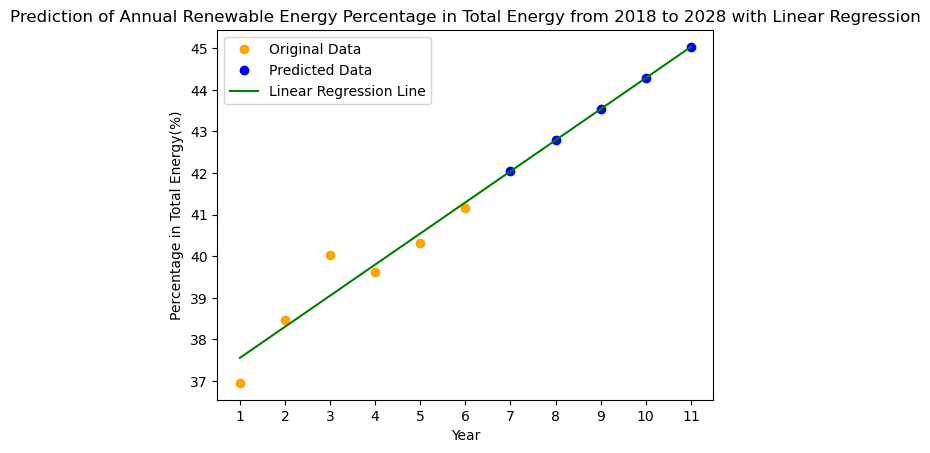

In [ ]:
# Reload the CSV file
filepath = pd.read_csv('combined_energy_statistics_by_year.csv')

# Original years and values
years = [1, 2, 3, 4, 5, 6]
values = [filepath['Percentage'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the ARIMA model
arima_model = ARIMA(values_array, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Predict future values for 2024-2028
predicted_values = arima_model_fit.forecast(steps=5)

# Combine original and predicted values for plotting
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_predicted_values = arima_model_fit.predict(start=0, end=len(extended_values)-1)

# Plot original data, predictions, and the ARIMA prediction line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([7, 8, 9, 10, 11], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='ARIMA Prediction Line')  # ARIMA prediction line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy(%)')
plt.title('Prediction of Annual Renewable Energy Percentage in Total Energy from 2018 to 2028 with ARIMA')
plt.legend()
plt.savefig('predictions/Prediction of Annual Renewable Energy Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')


slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

0.05193564761916511
2.2609633574421766


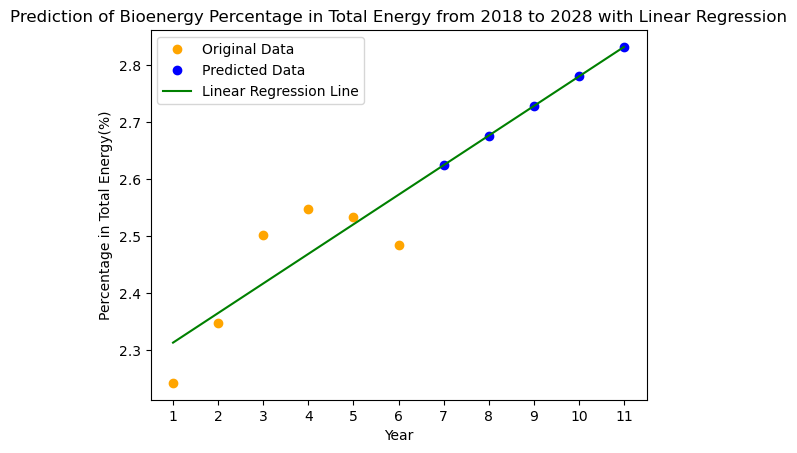

In [5]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [1, 2, 3, 4, 5, 6]
values = [filepath['Bioenergy Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([7, 8, 9, 10, 11]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [7, 8, 9, 10, 11]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([7, 8, 9, 10, 11], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy(%)')
plt.title('Prediction of Bioenergy Percentage in Total Energy from 2018 to 2028 with ARIMA')
plt.legend()
plt.savefig('predictions/Prediction of Bioenergy Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')


slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

0.699947379128523
-1410.2800737292102


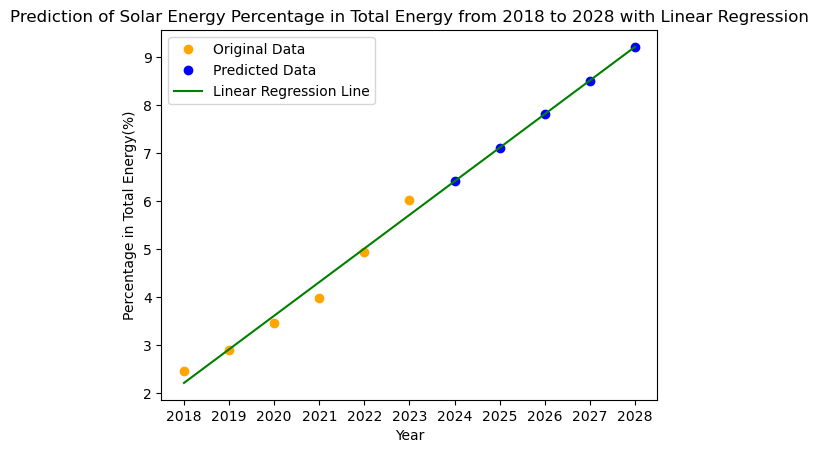

In [10]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Solar Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy(%)')
plt.title('Prediction of Solar Energy Percentage in Total Energy from 2018 to 2028 with ARIMA')
plt.legend()
plt.savefig('predictions/Prediction of Solar Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')


slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

0.6964098717905841
-1399.9928810173124


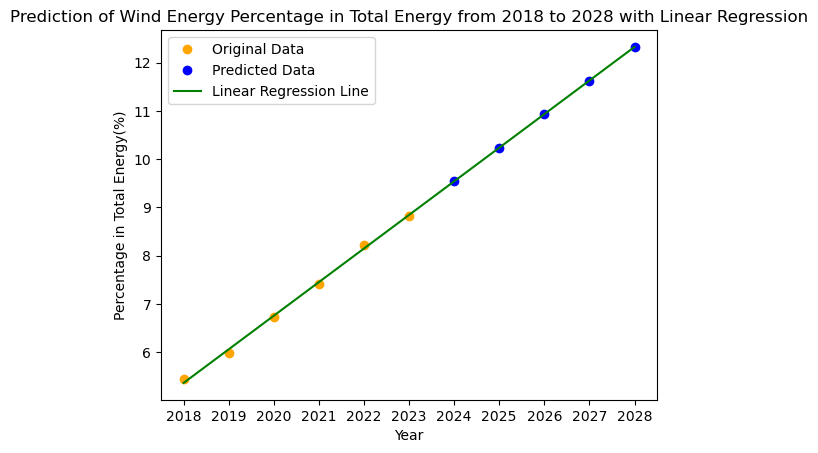

In [11]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Wind Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy(%)')
plt.title('Prediction of Wind Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Wind Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')


slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

-0.39095033774166227
804.6003164106041


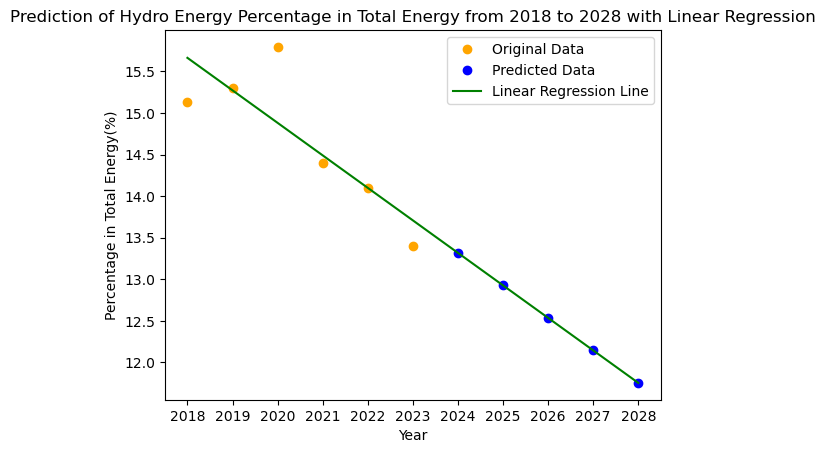

In [12]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Hydro Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy(%)')
plt.title('Prediction of Hydro Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Hydro Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')


slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

-0.3041412756104394
625.5711471386446


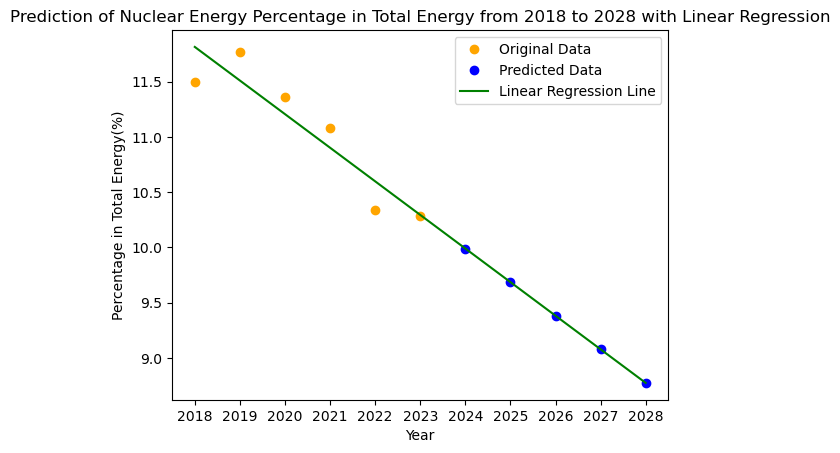

In [13]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Nuclear Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy(%)')
plt.title('Prediction of Nuclear Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Nuclear Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')


slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

-0.4435620565799048
935.4244635986627


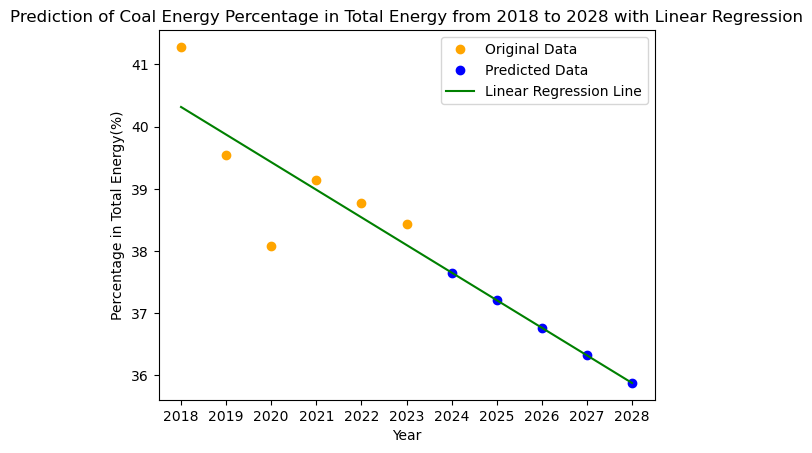

In [14]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Coal Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy(%)')
plt.title('Prediction of Coal Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Coal Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')


slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

-0.2487251921876313
521.9182283584968


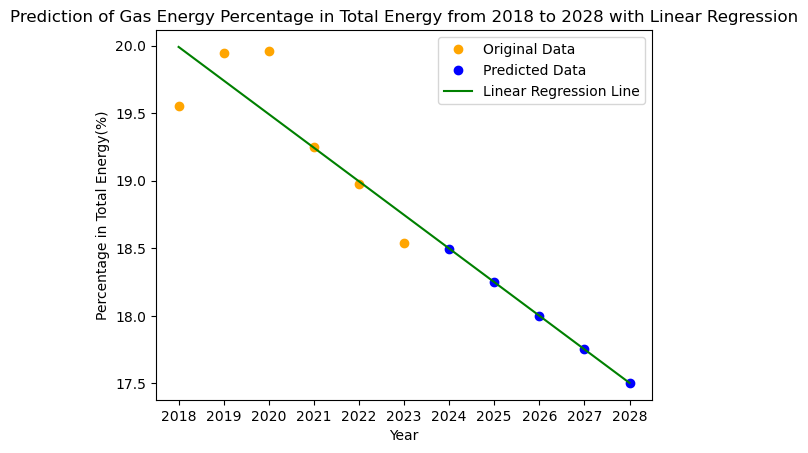

In [15]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Gas Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy(%)')
plt.title('Prediction of Gas Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Gas Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')



slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

-0.05529829731568131
113.72845209044011


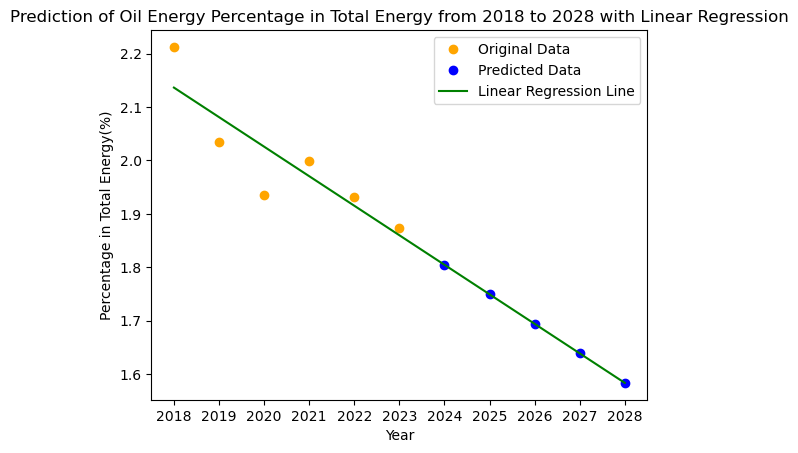

In [16]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Oil Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy(%)')
plt.title('Prediction of Oil Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Oil Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')



slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)